<a href="https://colab.research.google.com/github/Kyveli-tsioli/hello-world/blob/main/Convolutional_Fashion_MNIST_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 3.6MB 5.6MB/s 
  Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [2]:
import tensorflow as tf

In [3]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()


import math
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
import random
from google.colab import files
from torch.autograd import Variable




In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import copy
from mpl_toolkits.axes_grid1 import ImageGrid


In [5]:

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images=train_images.reshape((train_images.shape[0],1,28,28))
test_images=test_images.reshape((test_images.shape[0],1,28,28))


4423680/4422102 [==============================] - 0s 0us/step


In [6]:
train_images
print(np.shape(train_images))
print(np.shape(test_images))

(60000, 1, 28, 28)
(10000, 1, 28, 28)


In [7]:
def get_device():
    if torch.cuda.is_available():
        device = 'cuda:0'
    else:
        device = 'cpu'
    return device

In [8]:
#split in MNIST1 and MNIST2
mnist_1=train_images[0:25000]
mnist_2=train_images[25000:50000]

#for the 3.1 task we only need mnist_1
mnist_1_labels=train_labels[0:25000]
mnist_2_labels=train_labels[25000:50000]


#split further mnist 1 in train set and validation set
mnist_1_train=mnist_1[0:20000]
mnist_1_valid=mnist_1[20000:25000]

mnist_1_train_labels=mnist_1_labels[0:20000]
mnist_1_valid_labels=mnist_1_labels[20000:25000]

In [ ]:
#label sets
#train_set_labels=train_labels[0:50000]
#print("train set labels",np.shape(train_set_labels))
#valid_set_labels=train_labels[50000:60000]
#print("validation set labels",np.shape(valid_set_labels))
#test_set_labels=test_labels
#print("test set labels",np.shape(test_set_labels))

In [9]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete8WU786/fashion_mnist-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete8WU786/fashion_mnist-test.tfrecord
Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [10]:
class_names = metadata.features['label'].names
#not included with the dataset, store them here to use later when plotting images 


print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
#preprocessing-normalisation

#mnist_1_train=mnist_1_train/255.0
#ƒcommnist_1_valid=mnist_1_valid/255.0



In [11]:
mnist_1_train

array([[[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]],


       [[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]],


       [[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]],


       ...,


       [[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]],


       [[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 

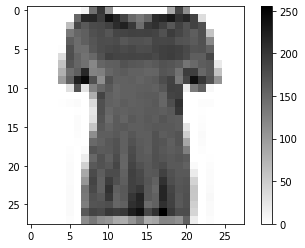

In [12]:
plt.figure()
plt.imshow(mnist_1_train[10].reshape((28,28)),cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

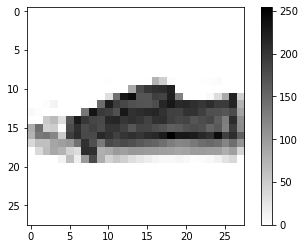

In [13]:
plt.figure()
plt.imshow(mnist_1_valid[10].reshape((28,28)),cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
mnist_1_train_labels

array([9, 0, 0, ..., 6, 5, 4], dtype=uint8)

In [15]:
np.shape(mnist_1_train_labels)

(20000,)

In [16]:
mnist_1_train_tensor=torch.tensor(mnist_1_train,dtype=torch.float)
mnist_1_valid_tensor=torch.tensor(mnist_1_valid,dtype=torch.float)

mnist_1_train_labels_tensor=torch.tensor(mnist_1_train_labels,dtype=torch.float)
mnist_1_valid_labels_tensor=torch.tensor(mnist_1_valid_labels,dtype=torch.float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  """Entry point for launching an IPython kernel.


In [17]:
batch_size=50
trainset_mnist_1=torch.utils.data.TensorDataset(mnist_1_train_labels_tensor, mnist_1_train_tensor)
mnist_1_train_loader = torch.utils.data.DataLoader(trainset_mnist_1, batch_size=batch_size,
                                              shuffle=True)

validset_mnist_1= torch.utils.data.TensorDataset(mnist_1_valid_labels_tensor, mnist_1_valid_tensor)
mnist_1_valid_loader= torch.utils.data.DataLoader(validset_mnist_1, batch_size=batch_size,
                                              shuffle=True)




In [18]:
class CNN(nn.Module):
  def __init__(self):
    
    super(CNN,self).__init__()
    self.conv1=nn.Conv2d(1,10,kernel_size=5)
    self.conv2=nn.Conv2d(10,20,kernel_size=5)

    self.fc1=nn.Linear(320, 50)
    self.fc2=nn.Linear(50,10)


  def forward(self,x):
    print(x.shape)
    x = F.max_pool2d(self.conv1(x), 2)
    x = F.relu(x)

    x = F.max_pool2d(self.conv2(x), 2)

    x = F.relu(x)

    x = x.view(-1, 320)
    x = F.relu(self.fc1(x))
    x=F.log_softmax(self.fc2(x),dim=1)


    
    return x

  



In [19]:
model=CNN()
print(model)

CNN(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


In [20]:
criterion=nn.CrossEntropyLoss()
learning_rate=0.0001
epochs=100
optimizer= torch.optim.Adam(model.parameters(), lr=learning_rate)

In [21]:
def training(model, train_loader, valid_loader, epochs):
  training_losses=[]
  training_accuracies=[]

  for epoch in range(epochs):
    current_training_loss=0.0
    current_training_accuracy=0.0

    for batch_index,training_batch in enumerate (train_loader,0):
      labels, inputs = training_batch
      labels, inputs = Variable(labels),Variable(inputs)

      print("inputs shape",  inputs.shape)

      print("labels shape", labels.shape)

      optimizer.zero_grad()
      #outputs=model.forward(inputs)
      outputs=model(inputs)
      print("outputs", outputs)
      print("labels", labels)
      loss=criterion(outputs,labels)
      loss.backward()
      optimizer.step()
      current_training_loss +=loss.item()

      #compute accuracy of the current batch
      correct_training_pred=0
      total_training_pred=0
      
      for data in training_batch:
        images, labels= training_batch
        outputs= model.forward(images)
        _, pred_labels= torch.max(outputs.data,1)

        correct_pred+= (pred_labels==labels).sum().item()
        total_pred+= pred_labels.size(0)


    #add accuracy to the overall acurracy
    current_accuracy+= (100 * correct_pred)/total_pred

    #compute average batch loss and accuracy at every 300 batches
    if batch_index % 300==299:

      print ('[epoch: %d Batch: %5d] loss: %.3f' % (epoch+1, batch_index+1, current_training_loss/300))

      #append the average loss and accuracy
      training_losses.append(current_training_loss/300)
      training_accuracies.append(current_accuracy/300)

      #reset the current loss and accuracy for the next 300 batches

      current_training_loss=0.0
      current_training_accuracy=0.0





In [22]:
trail1=training(model,mnist_1_train_loader, mnist_1_valid_loader,epochs)

inputs shape torch.Size([50, 1, 28, 28])
labels shape torch.Size([50])
torch.Size([50, 1, 28, 28])
outputs tensor([[-2.0497e+01, -9.3666e+00, -5.0160e+00, -3.1155e+00, -6.5049e+00,
         -1.3399e+01, -1.0383e+01, -1.0769e+01, -5.4058e-02, -1.3797e+01],
        [-1.7253e+01, -1.3256e+01, -6.5494e+00, -3.8961e-02, -7.2925e+00,
         -1.6703e+01, -1.3485e+01, -8.8280e+00, -3.3256e+00, -1.6878e+01],
        [-2.3615e+01, -1.2354e+01, -9.3530e+00, -7.2782e+00, -9.3837e+00,
         -1.9441e+01, -8.5901e+00, -1.3411e+01, -1.0535e-03, -1.9169e+01],
        [-1.8584e+01, -1.2334e+01, -4.3549e+00, -4.8372e+00, -6.0321e+00,
         -1.8628e+01, -1.1587e+01, -1.2860e+01, -2.3462e-02, -1.6511e+01],
        [-1.1423e+01, -4.8285e+00, -6.1495e+00, -2.8789e+00, -6.0528e+00,
         -1.2438e+01, -4.6617e+00, -6.9575e+00, -8.2437e-02, -1.0343e+01],
        [-1.9426e+01, -1.2174e+01, -8.1856e+00, -2.5040e+00, -8.2643e+00,
         -1.8302e+01, -1.1492e+01, -1.3148e+01, -8.5902e-02, -1.3533e+01],

RuntimeError: ignored